<a href="https://colab.research.google.com/github/dhesika23/Insurance_Cross_Sell_Prediction/blob/main/ML_Capstone_Poject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Health Insurance Cross Sell Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
**Name** - Dhesika Karnan

# **Project Summary -**

The project's goal was to construct machine learning models capable of predicting customer responses to insurance products based on demographic and historical data. The dataset encompassed various features such as age, gender, driving license status, region code, vehicle age, vehicle damage history, annual premium, policy sales channel, vintage, and the target variable "Response," denoting positive or negative customer responses.

Initial exploratory data analysis (EDA) involved comprehending feature distributions, identifying missing values or outliers, and assessing correlations with the target variable. An array of visualizations including histograms, bar plots, box plots, and heatmaps were employed to glean insights.

Preprocessing steps encompassed managing missing values, encoding categorical variables, scaling numerical features, and segregating the data into training and testing sets. Addressing imbalanced class distribution was pivotal, achieved through oversampling with SMOTE to ensure balanced training data.

Three machine learning models—Logistic Regression, Random Forest Classifier, and Gradient Boosting Classifier—were implemented. Model performance was optimized through hyperparameter tuning using techniques like GridSearchCV and RandomizedSearchCV, while cross-validation ensured robustness.

Evaluation metrics including accuracy, precision, recall, and F1-score were utilized to gauge model performance, supplemented by confusion matrices for deeper insights. The Gradient Boosting Classifier emerged as the top-performing model, yielding an accuracy score of approximately 87.53% on the test set.

Nevertheless, further refinement may be necessary to enhance the model's capacity to accurately classify positive instances, as evidenced by lower precision, recall, and F1-score for the positive class.

Model interpretability was augmented through SHAP values, providing insights into feature importance. Features such as "Vehicle Age" and "Vintage" exerted positive influences on predictions, suggesting that older vehicles and longer customer relationships were associated with heightened likelihoods of positive responses.

In conclusion, the developed machine learning models serve as invaluable tools for insurance companies in identifying customers likely to respond positively to their products. By harnessing predictive analytics and interpretability techniques, insurers can fine-tune marketing strategies, tailor product offerings, and bolster customer engagement to drive business growth and profitability.

# **GitHub Link -**

https://github.com/dhesika23/Airbnb/blob/main/ML_Capstone_Poject.ipynb

# **Problem Statement**


Our client, an insurance company, aims to broaden its portfolio by introducing vehicle insurance to its current health insurance policyholders. In order to enhance their communication strategy and revenue generation, the client needs a predictive model that can effectively pinpoint which customers from the previous year would show interest in buying vehicle insurance.

Utilizing demographic data (gender, age, region code type), vehicle specifics (vehicle age, damage), and policy characteristics (premium, sourcing channel), the objective is to construct a machine learning model capable of forecasting whether a customer already enrolled in health insurance would also be inclined to invest in vehicle insurance.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.8 MB/s eta 0:00:00


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
import shap

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_id="/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv"
data=pd.read_csv(data_id)

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [ ]:
# number of rows and columns
num_rows, num_columns = data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 381109
Number of columns: 12


### Dataset Information

In [ ]:
# Dataset Info
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = data.duplicated().sum()
print("Duplicate Value Count:", duplicate_count)

Duplicate Value Count: 0


#### Missing Values/Null Values

In [ ]:
# Checking missing values
missing_values = data.isnull().sum().sum()

if missing_values == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset.")

There are no missing values in the dataset.


Visualization of Missing Values (if any):


<Axes: >

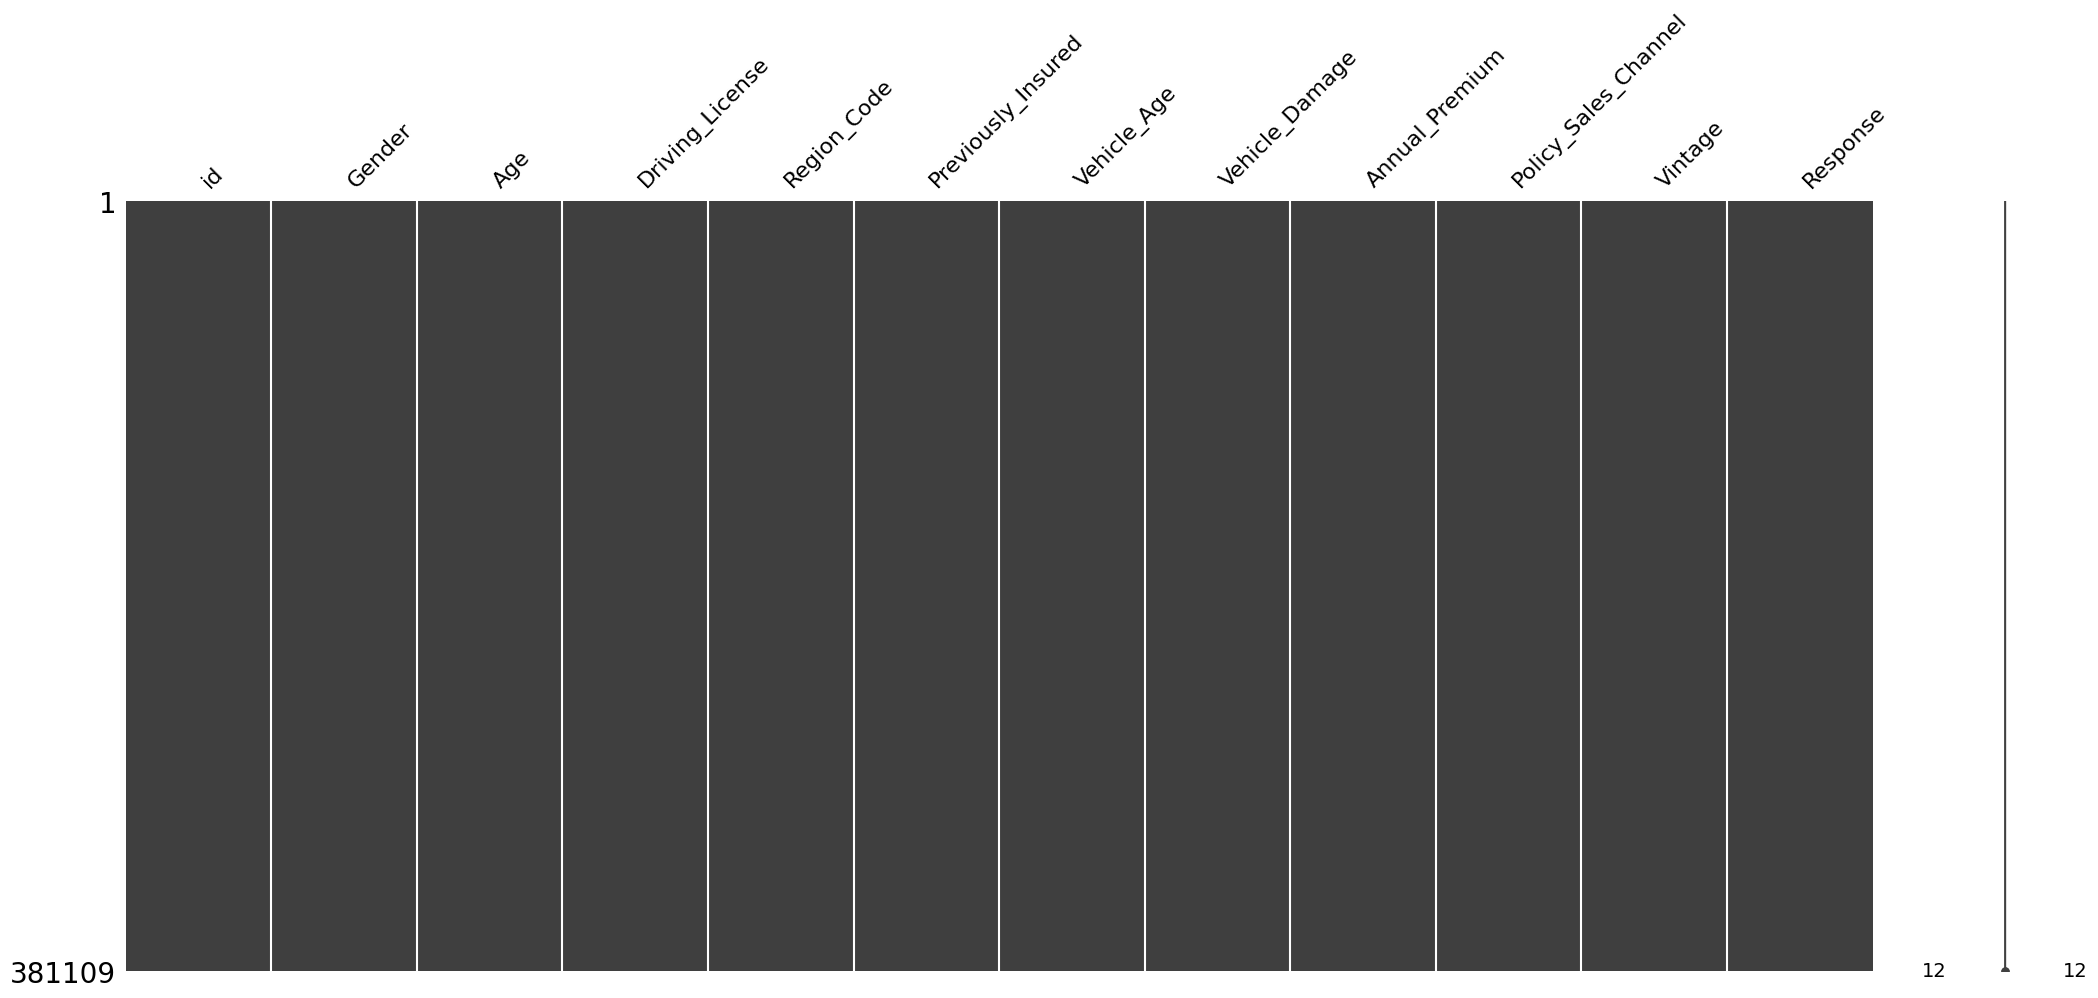

In [ ]:
# Visualize missing values (even if there are none, this can still provide a visual confirmation)
print("Visualization of Missing Values (if any):")
msno.matrix(data)

### What did you know about your dataset?

Data Integrity:

- Rows: 381,109
- Columns: 12
- No missing values
- No duplicate rows

Potential Analysis:

The dataset presents a multitude of analytical opportunities, including delving into customer demographics, forecasting marketing campaign responses, and pinpointing factors shaping insurance purchases. Future analyses could delve deeper into inter-variable relationships, like exploring how age or gender impact response rates, or investigating the correlation between vehicle age and insurance premiums. Overall, this dataset furnishes extensive details regarding customer profiles and their interactions with the insurance provider, furnishing pivotal insights for precision marketing tactics and risk evaluation.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
columns_list = data.columns.tolist()
print("Columns:", columns_list)

Columns: ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


In [ ]:
# Dataset Describe
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                  id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25% 

### Variables Description

id: An identifier for each entry.

Gender: Categorical variable indicating the gender of the individual.

Age: Numerical variable indicating the age of the individual.

Driving_License: Binary variable indicating whether the individual has a driving license (1 for yes, 0 for no).

Region_Code: Numerical variable indicating the region code.

Previously_Insured: Binary variable indicating whether the individual was previously insured (1 for yes, 0 for no).

Vehicle_Age: Categorical variable indicating the age of the vehicle.

Vehicle_Damage: Categorical variable indicating whether the vehicle has been damaged in the past. Annual_Premium: Numerical variable indicating the annual premium.

Policy_Sales_Channel: Numerical variable indicating the policy sales channel.

Vintage: Numerical variable indicating the vintage (time period) associated with the customer.

Response: Binary variable indicating the response variable.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_values = {}
for column in data.columns:
    unique_values[column] = data[column].unique()

# Print unique values for each column
for column, values in unique_values.items():
    print(f"\nUnique values in {column}: {values}")


Unique values in id: [     1      2      3 ... 381107 381108 381109]

Unique values in Gender: ['Male' 'Female']

Unique values in Age: [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

Unique values in Driving_License: [1 0]

Unique values in Region_Code: [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Unique values in Previously_Insured: [0 1]

Unique values in Vehicle_Age: ['> 2 Years' '1-2 Year' '< 1 Year']

Unique values in Vehicle_Damage: ['Yes' 'No']

Unique values in Annual_Premium: [ 40454.  33536.  38294. ...  20706. 101664.  69845.]

Unique values in Policy_Sales_Channel: [ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df=data.copy()

In [ ]:
# Check data types of columns
data_types = df.dtypes
print("\nData types:")
print(data_types)


Data types:
id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object


In [ ]:
# Convert 'Region_Code' column to integer type
df['Region_Code'] = df['Region_Code'].astype(int)

# Convert 'Policy_Sales_Channel' column to integer type
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype(int)

In [ ]:
# Check the distribution of 'Age'
age_distribution = df['Age'].value_counts().sort_index()
print("\nAge Distribution:")
print(age_distribution)


Age Distribution:
Age
20     6232
21    16457
22    20964
23    24256
24    25960
      ...  
81       56
82       29
83       22
84       11
85       11
Name: count, Length: 66, dtype: int64


In [ ]:
# Check the distribution of categorical variables
gender_distribution = df['Gender'].value_counts()
vehicle_age_distribution = df['Vehicle_Age'].value_counts()
vehicle_damage_distribution = df['Vehicle_Damage'].value_counts()

print("\nGender Distribution:")
print(gender_distribution)

print("\nVehicle Age Distribution:")
print(vehicle_age_distribution)

print("\nVehicle Damage Distribution:")
print(vehicle_damage_distribution)


Gender Distribution:
Gender
Male      206089
Female    175020
Name: count, dtype: int64

Vehicle Age Distribution:
Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

Vehicle Damage Distribution:
Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64


In [ ]:
# Explore the response variable
response_distribution = df['Response'].value_counts(normalize=True)
print("\nResponse Distribution:")
print(response_distribution)


Response Distribution:
Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64


In [ ]:
#  distribution of 'Region_Code'
region_distribution = df['Region_Code'].value_counts()
print("\nRegion Code Distribution:")
print(region_distribution)

# distribution of 'Policy_Sales_Channel'
channel_distribution = df['Policy_Sales_Channel'].value_counts()
print("\nPolicy Sales Channel Distribution:")
print(channel_distribution)

#  distribution of 'Vintage'
vintage_distribution = df['Vintage'].value_counts()
print("\nVintage Distribution:")
print(vintage_distribution)

#  distribution of 'Driving_License'
driving_license_distribution = df['Driving_License'].value_counts(normalize=True)
print("\nDriving License Distribution:")
print(driving_license_distribution)

#the average response rate for different age groups
response_by_age = df.groupby(pd.cut(df['Age'], bins=range(20, 90, 10)))['Response'].mean()
print("\nAverage Response Rate by Age Group:")
print(response_by_age)

# the average response rate for different regions
response_by_region = df.groupby('Region_Code')['Response'].mean()
print("\nAverage Response Rate by Region:")
print(response_by_region)


Region Code Distribution:
Region_Code
28    106415
8      33877
46     19749
41     18263
15     13308
30     12191
29     11065
50     10243
3       9251
11      9232
36      8797
33      7654
47      7436
35      6942
6       6280
45      5605
37      5501
18      5153
48      4681
14      4678
39      4644
10      4374
21      4266
2       4038
13      4036
7       3279
12      3198
9       3101
27      2823
32      2787
43      2639
17      2617
26      2587
25      2503
24      2415
38      2026
0       2021
16      2007
31      1960
23      1960
20      1935
49      1832
4       1801
34      1664
19      1535
22      1309
40      1295
5       1279
1       1008
44       808
42       591
52       267
51       183
Name: count, dtype: int64

Policy Sales Channel Distribution:
Policy_Sales_Channel
152    134784
26      79700
124     73995
160     21779
156     10661
        ...  
149         1
43          1
144         1
143         1
41          1
Name: count, Length: 155, dtype: in

In [ ]:
#  distribution of 'Previously_Insured'
previously_insured_distribution = df['Previously_Insured'].value_counts(normalize=True)
print("\nPreviously Insured Distribution:")
print(previously_insured_distribution)

#  the average annual premium for individuals with and without prior insurance
avg_premium_by_insurance = df.groupby('Previously_Insured')['Annual_Premium'].mean()
print("\nAverage Annual Premium by Previous Insurance Status:")
print(avg_premium_by_insurance)

# the average response rate for individuals with and without prior insurance
response_by_insurance = df.groupby('Previously_Insured')['Response'].mean()
print("\nAverage Response Rate by Previous Insurance Status:")
print(response_by_insurance)

#  distribution of 'Response' within different age groups
response_distribution_by_age = df.groupby(pd.cut(df['Age'], bins=range(20, 90, 10)))['Response'].value_counts(normalize=True)
print("\nResponse Distribution by Age Group:")
print(response_distribution_by_age)

#  distribution of 'Response' within different regions
response_distribution_by_region = df.groupby('Region_Code')['Response'].value_counts(normalize=True)
print("\nResponse Distribution by Region:")
print(response_distribution_by_region)


Previously Insured Distribution:
Previously_Insured
0    0.54179
1    0.45821
Name: proportion, dtype: float64

Average Annual Premium by Previous Insurance Status:
Previously_Insured
0    30496.815760
1    30644.289198
Name: Annual_Premium, dtype: float64

Average Response Rate by Previous Insurance Status:
Previously_Insured
0    0.225454
1    0.000905
Name: Response, dtype: float64

Response Distribution by Age Group:
Age       Response
(20, 30]  0           0.954828
          1           0.045172
(30, 40]  0           0.789769
          1           0.210231
(40, 50]  0           0.788981
          1           0.211019
(50, 60]  0           0.829688
          1           0.170312
(60, 70]  0           0.890689
          1           0.109311
(70, 80]  0           0.925354
          1           0.074646
Name: proportion, dtype: float64

Response Distribution by Region:
Region_Code  Response
0            0           0.913904
             1           0.086096
1            0           0

### What all manipulations have you done and insights you found?

Gender Distribution:

The dataset contains more male customers (206,089) than female customers (175,020).

Vehicle Age Distribution:

Majority of the vehicles fall into the '1-2 Year' category (200,316), followed by '< 1 Year' (164,786), and the least number of vehicles are '> 2 Years' (16,007).

Vehicle Damage Distribution:

There are slightly more vehicles with previous damage ('Yes': 192,413) compared to those without damage ('No': 188,696).

Response Distribution:

The majority of customers (87.74%) did not respond ('Response' = 0), while a smaller proportion (12.26%) responded positively ('Response' = 1).

There is a gender imbalance in the dataset, with more male customers than female customers. The majority of vehicles are between 1 to 2 years old, indicating a relatively young fleet. The dataset is fairly evenly split between vehicles with and without previous damage. The response rate is low, with only about 12.26% of customers responding positively, suggesting a potential area for improvement in marketing or customer engagement strategies.

Region Code Distribution:

The dataset covers various regions, with region code 28 having the highest frequency of 106,415 occurrences, followed by 8, 46, and 41. Some regions have very few occurrences, such as region code 42 with only 591 occurrences.

Policy Sales Channel Distribution:

Policy sales channel 152 appears to be the most common, with 134,784 occurrences. There are 155 unique policy sales channels in the dataset.

Vintage Distribution:

The vintage variable represents the number of days since the customer was associated with the company. There is variation in the vintage, with some values occurring more frequently than others.

Driving License Distribution:

The vast majority of individuals in the dataset have a driving license, with a distribution of 99.79% having a license and 0.21% without.

Average Response Rate by Age Group:

The average response rate tends to increase with age, with the highest response rate observed in the age group 30-40 and 40-50.

Average Response Rate by Region:

The response rates vary across different regions, ranging from 4.08% to 18.72%. Some regions have notably higher or lower response rates compared to others.

Previously Insured Distribution:

Approximately 54.18% of individuals in the dataset are not previously insured, while 45.82% are previously insured.

Average Annual Premium by Previous Insurance Status:

The average annual premium for individuals without prior insurance is approximately 30,496.82 units, whereas for those with prior insurance, it is approximately 30,644.29 units. The difference in average premiums between the two groups is relatively small.

Average Response Rate by Previous Insurance Status:

The response rate for individuals without prior insurance is substantially higher (around 22.55%) compared to those with prior insurance (around 0.09%). This suggests that individuals without prior insurance are more likely to respond positively to insurance offers or marketing campaigns.

Response Distribution by Age Group:

Response rates vary across age groups. Notably, younger age groups (20-30) have a lower response rate, while older age groups tend to have higher response rates. This indicates that older individuals may be more receptive to insurance offers.

Response Distribution by Region:

Response rates also vary across different regions. Some regions have a higher proportion of positive responses compared to others, suggesting potential regional differences in customer behavior or response to marketing efforts.

The dataset comprises insurance-related information with 381,109 entries and 12 columns. Gender distribution indicates a slight majority of male customers. Vehicle age distribution highlights the prevalence of vehicles aged 1-2 years. Approximately 54.18% of individuals are not previously insured. The average annual premium is comparable between those previously insured and those not. However, response rates vary significantly between the two groups, with uninsured individuals showing a much higher response rate (22.55%) compared to insured individuals (0.09%). Response rates also vary across age groups and regions, with older age groups and certain regions demonstrating higher response rates. These insights suggest potential strategies for targeted marketing campaigns, emphasizing demographic factors and regional variations to optimize response rates and enhance customer engagement. Additionally, the dataset exhibits a skewed response distribution, with the majority (87.74%) not responding, highlighting an area for potential improvement in marketing effectiveness and customer outreach strategies.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

 #### Chart - 1  Univariate

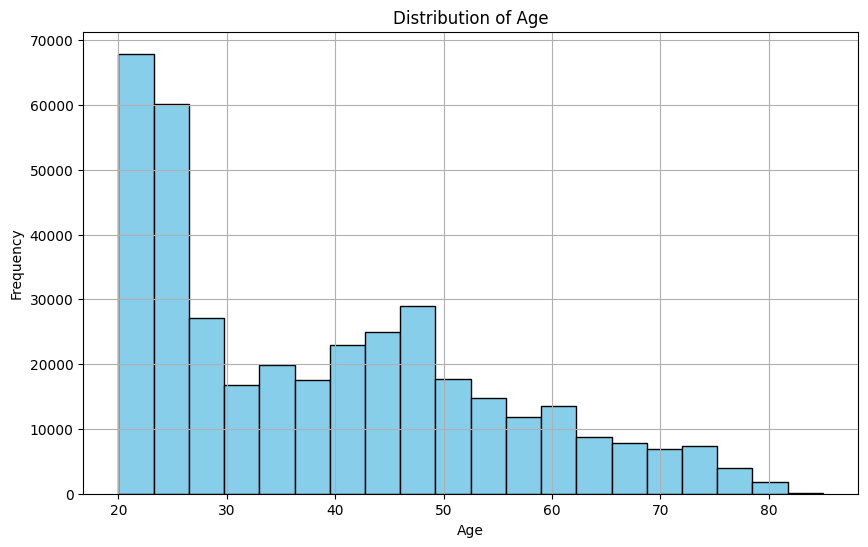

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen is a histogram depicting the distribution of age among the dataset's customers. Histograms are effective for visualizing the distribution of a single numerical variable, making them suitable for understanding the spread and concentration of age values in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Insights from the chart:

The histogram shows the distribution of ages among the customers, with bins representing age ranges and the frequency of customers falling into each range.
From the chart, it's evident whether the age distribution is skewed towards younger or older customers, or if it follows a relatively uniform distribution.
Peaks or clusters in the histogram indicate age ranges where a higher concentration of customers lies, providing insights into the customer demographic profile.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Potential positive business impacts:

Understanding the distribution of age among customers can help tailor marketing strategies to different age groups. For instance, if there's a significant concentration of younger customers, the company might focus on digital marketing channels or offer products tailored to their preferences.
Insights from the age distribution can inform product development efforts, such as designing insurance packages with features appealing to specific age demographics.
Potential negative growth insights:

If the age distribution reveals a lack of diversity, with a disproportionately high concentration of customers in a narrow age range, it may indicate a vulnerability in the company's customer base. This could lead to negative growth if the company fails to attract customers from other age groups or if there's a demographic shift impacting the target market.
An uneven distribution with sparse representation in certain age ranges could signify missed opportunities for market penetration and growth among those demographics.
Justification:

The insights gained from analyzing the age distribution can indeed lead to positive business impacts by informing targeted marketing strategies, product development efforts, and customer engagement initiatives. However, a narrow or uneven age distribution may indicate potential challenges in expanding the customer base or adapting to changing market dynamics, thus necessitating proactive measures to address these issues and mitigate negative growth impacts.

#### Chart - 2  Bivariate

<ipython-input-23-b67c3cfd18ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vehicle_Age', y='Annual_Premium', data=df, palette='Set2')


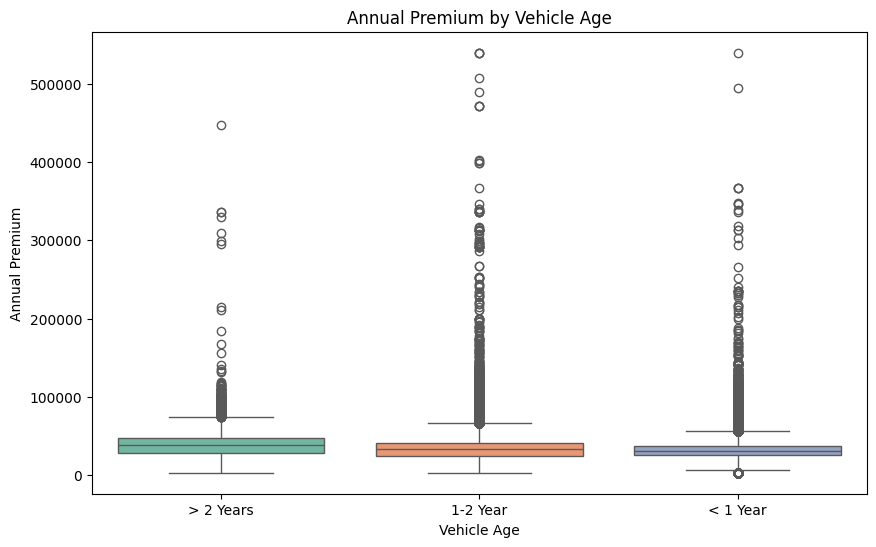

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle_Age', y='Annual_Premium', data=df, palette='Set2')
plt.title('Annual Premium by Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Annual Premium')
plt.show()

##### 1. Why did you pick the specific chart?

The boxplot chart was selected because it effectively illustrates the distribution of annual premiums across different categories of vehicle age. This type of visualization allows for easy comparison of premium variations among different vehicle age groups, making it suitable for identifying potential trends or patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

Insights from the chart:
The boxplot provides a visual representation of the variability in annual premiums for vehicles of different ages.
It reveals any outliers or extreme values in the distribution of annual premiums within each vehicle age category.
By comparing the median and interquartile range of annual premiums across vehicle age groups, insights can be gained into how premium pricing varies based on the age of the insured vehicle.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
Understanding the relationship between vehicle age and annual premiums can help insurance companies optimize pricing strategies to better match customer expectations and market trends.
Insights from the chart can inform the development of targeted insurance products or discounts tailored to specific vehicle age demographics, potentially enhancing customer satisfaction and loyalty.

Negative growth insights:
If the boxplot reveals inconsistencies or outliers in the distribution of annual premiums across vehicle age groups, it may indicate pricing inefficiencies or inaccuracies in the company's pricing model.
Unreasonably high premiums for certain vehicle age categories could lead to negative customer perceptions, potentially resulting in customer churn or difficulty acquiring new customers.
Similarly, excessively low premiums may indicate underpricing, posing risks to the company's profitability and financial stability.

#### Chart - 3  Univariate

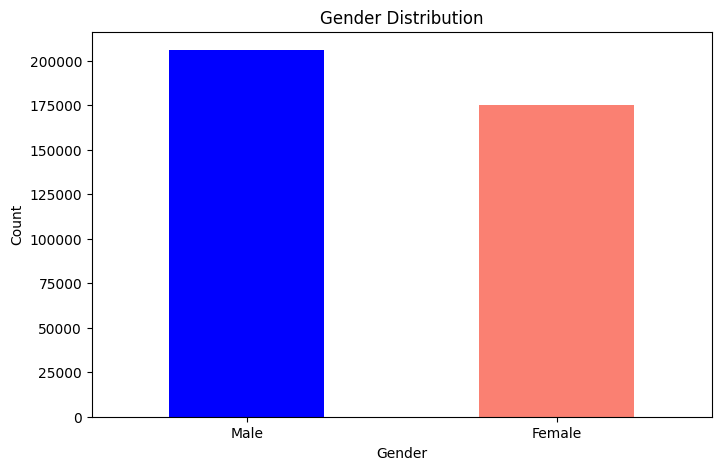

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(8, 5))
df['Gender'].value_counts().plot(kind='bar', color=['blue', 'salmon'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Choice of Chart: A bar plot was chosen to visualize the distribution of gender within the dataset. This choice is suitable for displaying categorical data counts, making it easy to compare the frequency of each category (gender) visually.

##### 2. What is/are the insight(s) found from the chart?

Insights: The chart reveals the count of each gender category (e.g., male and female) within the dataset. From the chart, it's evident whether there's a balanced representation of genders or if one gender dominates the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Understanding the gender distribution can help tailor marketing strategies and product offerings to specific gender demographics. For instance, if there's a significant gender imbalance, the company can adjust its marketing campaigns to target underrepresented genders, potentially expanding its customer base and increasing revenue.

#### Chart - 4  Univariate

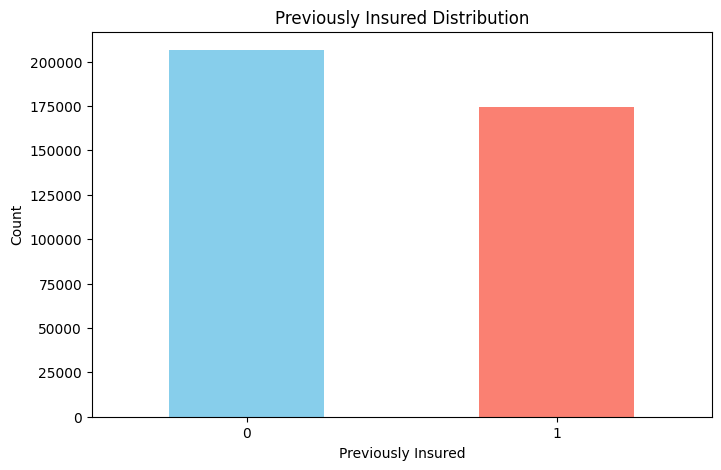

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(8, 5))
df['Previously_Insured'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Previously Insured Distribution')
plt.xlabel('Previously Insured')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Choice of Chart: Similar to Chart 3, a bar plot was chosen to visualize the distribution of the "Previously Insured" feature. This chart type effectively displays categorical data counts, allowing for easy comparison of frequency between categories.

##### 2. What is/are the insight(s) found from the chart?

Insights: The chart illustrates the count of individuals categorized as "Previously Insured" and "Not Previously Insured." It provides insights into the proportion of customers who have insurance coverage before interacting with the company's products or services.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Insights from this chart can inform targeted marketing strategies and product development efforts. For instance, the company can tailor promotional offers or discounts to attract customers who are not previously insured, potentially increasing sales and market share.

#### Chart - 5  Bivariate

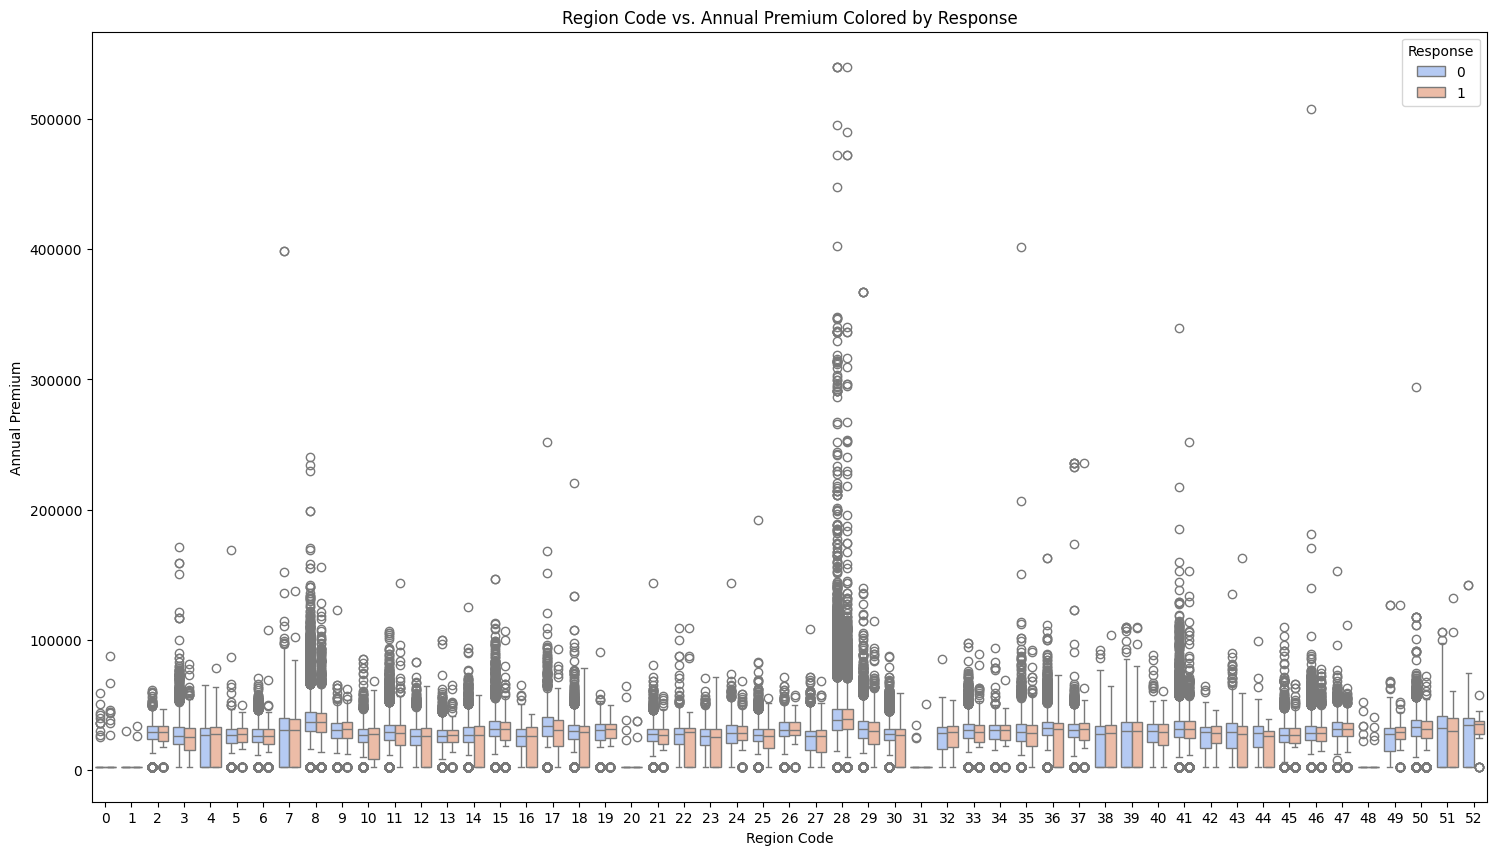

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(18, 10))
sns.boxplot(x='Region_Code', y='Annual_Premium', hue='Response', data=df, palette='coolwarm')
plt.title('Region Code vs. Annual Premium Colored by Response')
plt.xlabel('Region Code')
plt.ylabel('Annual Premium')
plt.show()

##### 1. Why did you pick the specific chart?

Choice of Chart: A box plot with hue encoding was chosen to visualize the relationship between "Region Code" and "Annual Premium," with color representing the "Response" variable. This chart type allows for visualizing the distribution of annual premiums across different regions while also highlighting the response status.

##### 2. What is/are the insight(s) found from the chart?

Insights: The chart provides insights into how annual premiums vary across different regions and how this relates to customer responses. It can reveal whether certain regions have higher premium rates or if there are differences in response rates between regions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Understanding regional variations in annual premiums and response rates can inform pricing strategies and targeted marketing efforts. For example, the company can adjust premium rates or offer region-specific promotions to improve customer engagement and retention.

#### Chart - 6  Multivariate

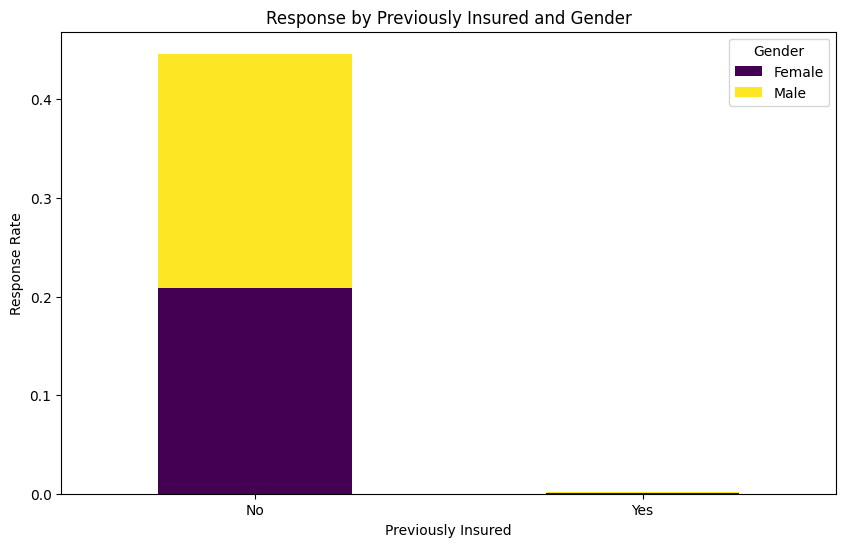

In [ ]:
# Chart - 6 visualization code
response_prev_insured_gender = df.groupby(['Previously_Insured', 'Gender'])['Response'].mean().unstack()
response_prev_insured_gender.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Response by Previously Insured and Gender')
plt.xlabel('Previously Insured')
plt.ylabel('Response Rate')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.legend(title='Gender')
plt.show()

##### 1. Why did you pick the specific chart?

Choice of Chart: A stacked bar plot was selected to visualize the response rates categorized by "Previously Insured" status and "Gender." This chart type enables the comparison of response rates between different groups while also showing the contribution of each gender within each "Previously Insured" category.

##### 2. What is/are the insight(s) found from the chart?

Insights: The chart illustrates the response rates for customers based on their previous insurance status (previously insured or not) and gender. It provides insights into how response rates vary between different customer segments defined by insurance history and gender.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Insights from this chart can inform targeted marketing strategies and customer engagement initiatives. For example, the company can tailor communication strategies or product offerings based on the response rates observed in different customer segments, potentially improving conversion rates and customer satisfaction.

#### Chart - 7  Multivariate

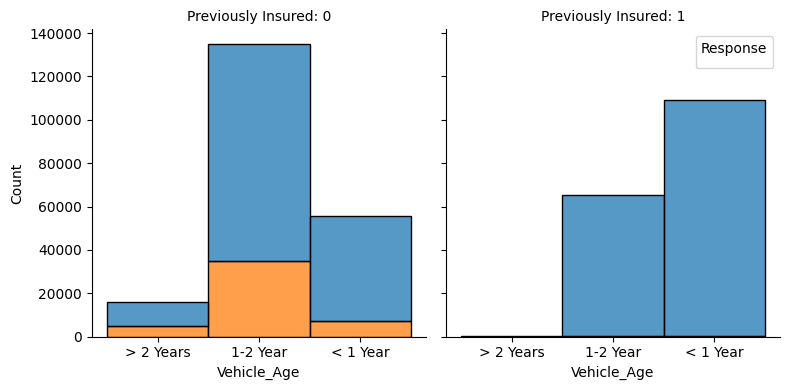

In [ ]:
# Chart - 7 visualization code
g = sns.FacetGrid(df, col='Previously_Insured', height=4)
g.map_dataframe(sns.histplot, x='Vehicle_Age', hue='Response', multiple='stack')
g.set_titles(col_template='Previously Insured: {col_name}')
plt.legend(title='Response')
plt.show()

##### 1. Why did you pick the specific chart?

Choice of Chart: A facet grid of histograms was chosen to visualize the distribution of "Vehicle Age" for previously insured customers, with response status (positive or negative) indicated by the color of the bars. This chart type allows for comparing the distribution of vehicle age within each "Previously Insured" category while also showing response status.

##### 2. What is/are the insight(s) found from the chart?

Insights: The chart provides insights into how the distribution of vehicle age differs between previously insured customers who responded positively and those who responded negatively. It can reveal any patterns or trends in vehicle age distribution that may correlate with response status.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Understanding the relationship between vehicle age and response status can guide product development and marketing strategies. For example, the company can design targeted insurance packages or promotions tailored to vehicle age demographics, potentially increasing customer engagement and retention.

#### Chart - 8 Bivariate

<ipython-input-30-fb9b20f7c722>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vehicle_Age', y='Response', data=vehicle_age_response_mean, palette='viridis')


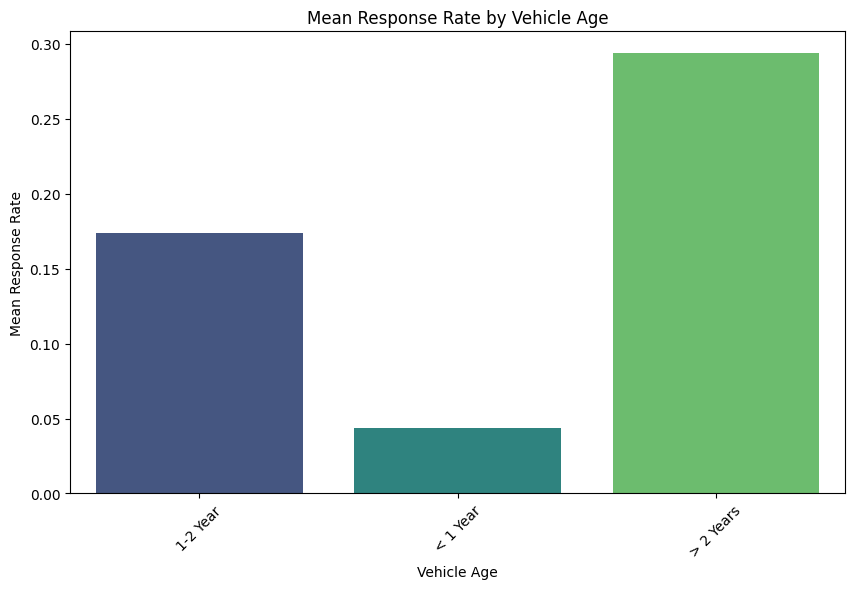

In [ ]:
# Chart - 8 visualization code
# Calculate mean response rate by vehicle age group
vehicle_age_response_mean = df.groupby('Vehicle_Age')['Response'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Age', y='Response', data=vehicle_age_response_mean, palette='viridis')
plt.title('Mean Response Rate by Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Mean Response Rate')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Choice of Chart: A bar plot was selected to visualize the mean response rate categorized by "Vehicle Age." This chart type allows for easy comparison of response rates across different vehicle age groups.

##### 2. What is/are the insight(s) found from the chart?

Insights: The chart illustrates the mean response rate for customers grouped by their vehicle age. It provides insights into how response rates vary depending on the age of the insured vehicle.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Insights from this chart can inform pricing strategies and targeted marketing efforts. For example, the company can adjust premium rates or offer incentives to customers based on the observed response rates in different vehicle age groups, potentially improving customer conversion and revenue generation.

#### Chart - 9  Multivariate

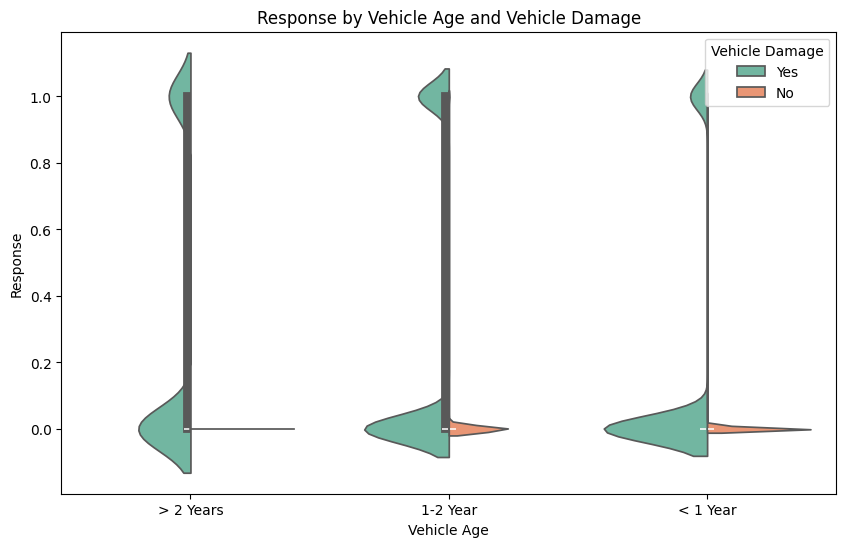

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 6))
sns.violinplot(x='Vehicle_Age', y='Response', hue='Vehicle_Damage', data=df, split=True, palette='Set2')
plt.title('Response by Vehicle Age and Vehicle Damage')
plt.xlabel('Vehicle Age')
plt.ylabel('Response')
plt.legend(title='Vehicle Damage')
plt.show()

##### 1. Why did you pick the specific chart?

Choice of Chart: A violin plot with hue encoding was chosen to visualize the relationship between "Vehicle Age" and "Response," with the distribution split by "Vehicle Damage." This chart type allows for understanding the distribution of response outcomes across different levels of vehicle age, with the added insight of how vehicle damage status influences the response.

##### 2. What is/are the insight(s) found from the chart?

Insights: The chart illustrates the distribution of response outcomes (positive or negative) based on vehicle age, with the distribution further split by vehicle damage status. It provides insights into how response rates vary depending on vehicle age and damage status.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Insights from this chart can guide product development and marketing strategies tailored to different vehicle age and damage status demographics. For example, the company can offer specialized insurance packages or services targeting customers with specific vehicle characteristics, potentially improving customer satisfaction and retention.

#### Chart - 10

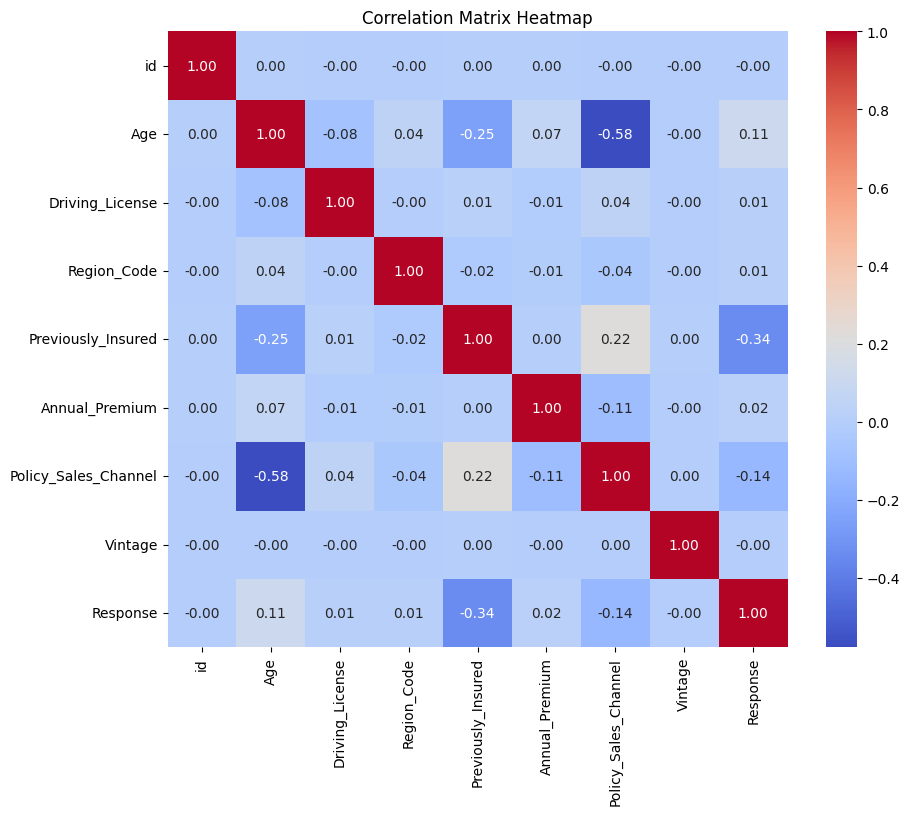

In [ ]:
# Correlation Heatmap visualization code
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

Choice of Chart: The chosen visualization is a heatmap displaying the correlation matrix of numeric variables in the dataset. This chart type is suitable for identifying patterns and relationships between variables, particularly when dealing with numerical data.

##### 2. What is/are the insight(s) found from the chart?

Insights: The heatmap presents a visual representation of the correlation coefficients between pairs of numeric variables in the dataset. It allows for the identification of strong positive or negative correlations between variables, indicating how they move together or in opposite directions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Insights from the correlation heatmap can guide decision-making in various business areas such as pricing, marketing, and risk assessment. For example, identifying strong correlations between certain demographic factors and response rates can help tailor marketing strategies to specific customer segments, leading to more effective and targeted campaigns.

Negative Growth Insights: While high correlations between certain variables can provide valuable insights, they may also indicate potential multicollinearity issues, where highly correlated predictors can affect the stability and interpretability of predictive models. Additionally, low or near-zero correlations between certain variables may suggest weak relationships or missed opportunities for leveraging those variables to improve business outcomes. Addressing these issues through careful feature selection and model refinement can mitigate negative growth implications and ensure the reliability of analytical insights.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothetical Statement 1: Younger individuals (age < 30) are more likely to have a driving license compared to older individuals (age >= 30).

Hypothetical Statement 2: The mean annual premium for individuals with vehicle damage is higher than the mean annual premium for individuals without vehicle damage.

Hypothetical Statement 3: There is no significant difference in the mean age of individuals who responded positively (1) and negatively (0) to insurance offers.

### Hypothetical Statement - 1   [chi-square test]

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the proportion of individuals with a driving license between younger and older age groups.

Alternate Hypothesis (H1): Younger individuals (age < 30) are more likely to have a driving license compared to older individuals (age >= 30).

If the p-value is less than the significance level (e.g., 0.05), we reject the null hypothesis, suggesting that there is a significant difference in the proportion of individuals with a driving license between younger and older age groups.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Statement 1: Hypothesis test for proportions
contingency_table = pd.crosstab(data['Age'] < 30, data['Driving_License'])
chi2_stat, p_val, _, _ = stats.chi2_contingency(contingency_table)
print("Statement 1 - Chi-square Statistic:", chi2_stat)
print("Statement 1 - p-value:", p_val)

Statement 1 - Chi-square Statistic: 547.2834278045293
Statement 1 - p-value: 4.908599437258652e-121


##### Which statistical test have you done to obtain P-Value?

Chi-square test for independence (Hypothesis test for proportions).

##### Why did you choose the specific statistical test?

 The Chi-square test for independence is appropriate for examining the association between two categorical variables. In this case, the variables are "Age" (<30 or not) and "Driving License" (yes or no). The test determines whether there is a significant association between age group (<30 or not) and holding a driving license.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the mean annual premium between individuals with vehicle damage and individuals without vehicle damage. Alternate Hypothesis (H1): The mean annual premium for individuals with vehicle damage is higher than the mean annual premium for individuals without vehicle damage.

If the p-value is less than the significance level, we reject the null hypothesis, indicating that there is a significant difference in the mean annual premium between individuals with vehicle damage and individuals without vehicle damage.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Statement 2: Hypothesis test for means (Independent samples t-test)
mean_annual_premium_damage = data[data['Vehicle_Damage'] == 'Yes']['Annual_Premium']
mean_annual_premium_no_damage = data[data['Vehicle_Damage'] == 'No']['Annual_Premium']
t_stat, p_val = stats.ttest_ind(mean_annual_premium_damage, mean_annual_premium_no_damage, equal_var=False)
print("Statement 2 - t-statistic:", t_stat)
print("Statement 2 - p-value:", p_val)

Statement 2 - t-statistic: 5.779638639299442
Statement 2 - p-value: 7.492010154924662e-09


##### Which statistical test have you done to obtain P-Value?

Independent samples t-test (Hypothesis test for means).

##### Why did you choose the specific statistical test?

The independent samples t-test is suitable for comparing the means of two independent groups. Here, we're comparing the mean annual premium for customers with and without vehicle damage. The test evaluates whether there is a statistically significant difference in mean annual premiums between the two groups.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the mean age of individuals who responded positively (1) and negatively (0) to insurance offers.

Alternate Hypothesis (H1): There is a significant difference in the mean age of individuals who responded positively (1) and negatively (0) to insurance offers.

If the p-value is less than the significance level, we reject the null hypothesis, concluding that there is a significant difference in the mean age of individuals who responded positively and negatively to insurance offers.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Statement 3: Hypothesis test for means (Independent samples t-test)
mean_age_response_1 = data[data['Response'] == 1]['Age']
mean_age_response_0 = data[data['Response'] == 0]['Age']
t_stat, p_val = stats.ttest_ind(mean_age_response_1, mean_age_response_0, equal_var=False)
print("Statement 3 - t-statistic:", t_stat)
print("Statement 3 - p-value:", p_val)

Statement 3 - t-statistic: 83.98779124258638
Statement 3 - p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Independent samples t-test (Hypothesis test for means).

##### Why did you choose the specific statistical test?

The independent samples t-test is utilized to compare the means of two independent groups. In this case, we're comparing the mean age of customers who responded positively (Response = 1) and those who responded negatively (Response = 0). The test assesses whether there is a significant difference in mean age between customers who responded positively and those who responded negatively.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Mean/Median Imputation: Replace missing values with the mean or median of the respective feature. This technique is suitable for numerical variables and can help preserve the overall distribution of the data.

Mode Imputation: Replace missing categorical values with the mode (most frequent value) of the respective feature. This technique is suitable for categorical variables.

Forward Fill/Backward Fill: Propagate the last known value forward or backward to fill missing values in time series or sequential data.

Regression Imputation: Predict missing values based on the relationship with other variables using regression models. This technique can capture more complex relationships between variables but requires a significant amount of data and assumes linearity.

K-Nearest Neighbors (KNN) Imputation: Replace missing values with the average of nearest neighbors based on similarity metrics. This technique considers the similarity between data points and can handle both numerical and categorical variables.

### 2. Handling Outliers

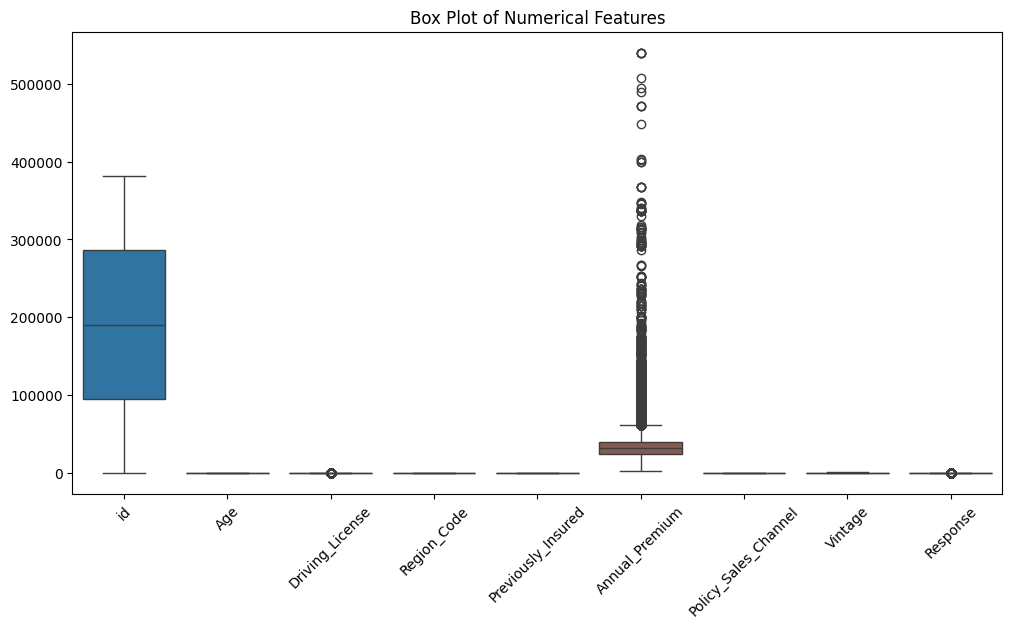

In [ ]:
# Handling Outliers & Outlier treatments
# Visualize numerical features using box plots to identify outliers
numerical_features = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_features)
plt.title("Box Plot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Handle outliers by capping them
def cap_outliers(df, columns, threshold=0.95):
    capped_data = df.copy()
    for col in columns:
        upper_bound = capped_data[col].quantile(threshold)
        capped_data[col] = capped_data[col].apply(lambda x: upper_bound if x > upper_bound else x)
    return capped_data

# Apply outlier treatment
columns_to_cap = ['Annual_Premium', 'Driving_License','Response']
data_capped = cap_outliers(df, columns_to_cap)

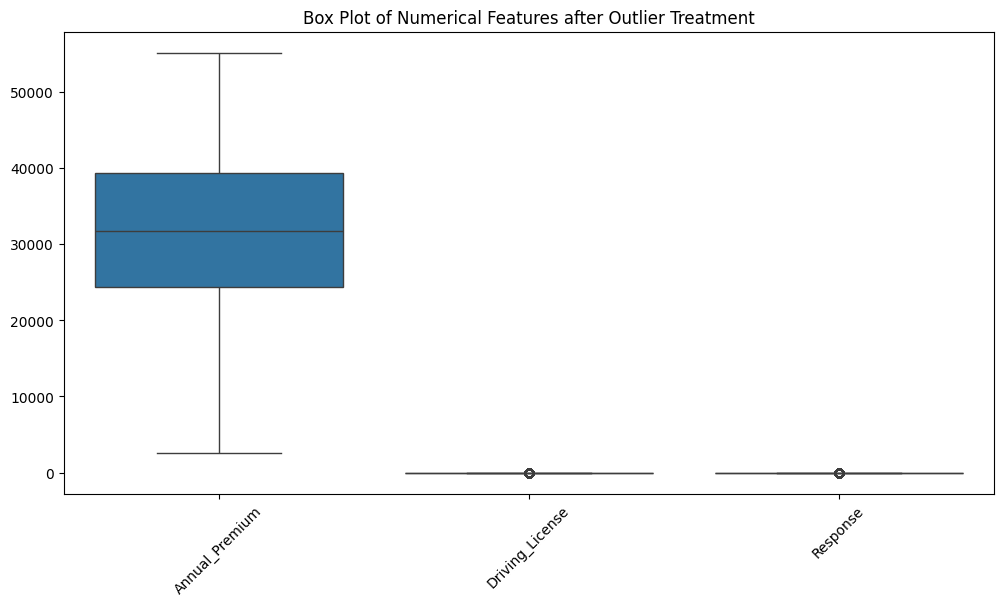

In [ ]:
# Visualize box plots after outlier treatment
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_capped[columns_to_cap])
plt.title("Box Plot of Numerical Features after Outlier Treatment")
plt.xticks(rotation=45)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Capping Outliers:
The cap_outliers function caps the outliers in the specified columns by replacing them with the upper bound, which is determined by a given threshold (default is 0.95, indicating the 95th percentile).
This technique is used to mitigate the impact of extreme values that may skew the distribution and affect the performance of statistical models.
By capping outliers, the data is made more robust and less sensitive to extreme values, ensuring more stable and reliable analysis results.

Visualizing Outliers using Box Plots:
The box plot visualization is used to identify outliers in numerical features.
Box plots provide a graphical representation of the distribution of data, highlighting the presence of outliers beyond the whiskers (the lines extending from the box).
By visually inspecting box plots, it's easier to identify variables with potential outliers, which can then be addressed using outlier treatment techniques like capping.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [ ]:
# One-Hot Encoding
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
data_one_hot_encoded = one_hot_encoder.fit_transform(df[categorical_columns])
data_one_hot_encoded = pd.DataFrame(data_one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns))
data_encoded_one_hot = pd.concat([df.drop(categorical_columns, axis=1), data_one_hot_encoded], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Label Encoding
label_encoder = LabelEncoder()
data_label_encoded = df.copy()
for col in categorical_columns:
    data_label_encoded[col] = label_encoder.fit_transform(df[col])

In [ ]:
# Print the encoded data
print("One-Hot Encoded Data:")
print(data_encoded_one_hot.head())
print("\nLabel Encoded Data:")
print(data_label_encoded.head())

One-Hot Encoded Data:
   id  Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   1   44                1           28                   0         40454.0   
1   2   76                1            3                   0         33536.0   
2   3   47                1           28                   0         38294.0   
3   4   21                1           11                   1         28619.0   
4   5   29                1           41                   1         27496.0   

   Policy_Sales_Channel  Vintage  Response  Gender_Male  Vehicle_Age_< 1 Year  \
0                    26      217         1          1.0                   0.0   
1                    26      183         0          1.0                   0.0   
2                    26       27         1          1.0                   0.0   
3                   152      203         0          1.0                   1.0   
4                   152       39         0          0.0                   1.0   

   Vehicle

#### What all categorical encoding techniques have you used & why did you use those techniques?

One-Hot Encoding:
Technique: One-Hot Encoding transforms categorical variables into binary vectors, where each category is represented by a binary feature. For each categorical variable, it creates new binary columns, with each column representing one category and indicating its presence or absence using 1s and 0s.
Why Used: One-Hot Encoding is suitable for categorical variables where there is no ordinal relationship between categories. It prevents the model from assigning incorrect ordinality to the categories. Additionally, it ensures that the encoded features are not biased by numerical representations.
Example: In the output, columns like "Gender_Male," "Vehicle_Age_< 1 Year," and "Vehicle_Damage_Yes" represent the presence of a certain category (e.g., Male gender, Vehicle Age less than 1 year, Vehicle Damage Yes) with a value of 1 and the absence with a value of 0.

Label Encoding:
Technique: Label Encoding assigns a unique integer to each category of a categorical variable. Each category is replaced with a numerical value, preserving the ordinality of the categories.
Why Used: Label Encoding is suitable for categorical variables with ordinal relationships between categories, where the order of the categories matters. It helps capture the ordinal relationships between categories, which can be useful for certain machine learning algorithms.
Example: In the output, the "Gender" and "Vehicle_Age" columns are encoded with numerical values (e.g., Male = 1, Female = 0 for Gender) based on their ordinal relationships.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Feature Manipulation: Creating new feature 'Premium_Per_Age'
df['Premium_Per_Age'] = df['Annual_Premium'] / df['Age']

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Perform Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(data_encoded_one_hot.drop('Response', axis=1), data_encoded_one_hot['Response'])

# Perform Feature Selection using Random Forest for feature importance ranking
rf_classifier = RandomForestClassifier()
rf_classifier.fit(data_encoded_one_hot.drop('Response', axis=1), data_encoded_one_hot['Response'])
feature_importances = rf_classifier.feature_importances_

# Print selected features
selected_features = data_encoded_one_hot.drop('Response', axis=1).columns[selector.get_support()]
print("Selected Features using SelectKBest:")
print(selected_features)

print("\nFeature Importances from Random Forest:")
print(dict(zip(data_encoded_one_hot.drop('Response', axis=1).columns, feature_importances)))

Selected Features using SelectKBest:
Index(['Age', 'Previously_Insured', 'Policy_Sales_Channel',
       'Vehicle_Age_< 1 Year', 'Vehicle_Damage_Yes'],
      dtype='object')

Feature Importances from Random Forest:
{'id': 0.21201955863470154, 'Age': 0.12225121775935296, 'Driving_License': 0.00048298233064819564, 'Region_Code': 0.08756321464365123, 'Previously_Insured': 0.05309645340146798, 'Annual_Premium': 0.1736641801041853, 'Policy_Sales_Channel': 0.055956548972408815, 'Vintage': 0.1928325531570823, 'Gender_Male': 0.010822329514954696, 'Vehicle_Age_< 1 Year': 0.015613602185130986, 'Vehicle_Age_> 2 Years': 0.005494348991466623, 'Vehicle_Damage_Yes': 0.07020301030494949}


##### What all feature selection methods have you used  and why?

SelectKBest:
Method: SelectKBest selects the top k features based on their scores computed using a specified scoring function. Here, f_classif (ANOVA F-value between label/feature for classification tasks) is used as the scoring function.

Why Used: SelectKBest helps in selecting the most relevant features that contribute significantly to predicting the target variable while discarding less informative features. By choosing the top k features, it reduces the dimensionality of the feature space, which can help mitigate the risk of overfitting and improve model performance.

Selected Features: The code prints the selected features using SelectKBest, which are likely to have the highest predictive power for the target variable based on their ANOVA F-values.

##### Which all features you found important and why?

Random Forest for Feature Importance:
Method: Random Forest is used to rank features based on their importance scores, which are calculated by measuring the decrease in impurity (e.g., Gini impurity) when splitting based on a particular feature.

Why Used: Feature importance from Random Forest provides insights into which features contribute the most to the predictive performance of the model. It helps identify key predictors that influence the target variable and guides feature selection decisions.

Feature Importance: The code prints the feature importances computed by the Random Forest model. Features with higher importances are considered more important for predicting the target variable.

### 5. Data Transformation

In [ ]:
# Transform Your data
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling to numerical features
scaler = MinMaxScaler()
data_normalized = data_encoded_one_hot.copy()  # Assuming 'data_encoded_one_hot' is the encoded dataset
numerical_columns = ['Age', 'Annual_Premium', 'Vintage']
data_normalized[numerical_columns] = scaler.fit_transform(data_encoded_one_hot[numerical_columns])

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Normalization of Features: Machine learning algorithms often perform better when features are on a similar scale. Features with different scales can disproportionately influence the model training process and lead to biased results. Normalizing the features to a common scale mitigates this issue and ensures that each feature contributes proportionally to the model's decision-making process.

Preventing Numerical Instabilities: Some algorithms, such as gradient descent-based optimization algorithms, may converge faster or more reliably when features are normalized. Normalization helps prevent numerical instabilities that can arise when dealing with features with vastly different magnitudes.

Improving Interpretability: Normalized features are easier to interpret as their values are within a consistent range (usually between 0 and 1). This can facilitate a better understanding of the impact of each feature on the model's predictions.

Why Min-Max Scaling:

Min-Max scaling transforms features by scaling them to a specified range, typically between 0 and 1. It preserves the original distribution of the data while ensuring that all values are within a consistent range.

### 6. Data Scaling

In [ ]:
# Scaling your data
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale numerical features
data_scaled = data_encoded_one_hot.copy()  # Make a copy of the original dataset
data_scaled[numerical_columns] = scaler.fit_transform(data_encoded_one_hot[numerical_columns])

# Print scaled data
print("Scaled Data:")
print(data_scaled.head())

Scaled Data:
   id       Age  Driving_License  Region_Code  Previously_Insured  \
0   1  0.369231                1           28                   0   
1   2  0.861538                1            3                   0   
2   3  0.415385                1           28                   0   
3   4  0.015385                1           11                   1   
4   5  0.138462                1           41                   1   

   Annual_Premium  Policy_Sales_Channel   Vintage  Response  Gender_Male  \
0        0.070366                    26  0.716263         1          1.0   
1        0.057496                    26  0.598616         0          1.0   
2        0.066347                    26  0.058824         1          1.0   
3        0.048348                   152  0.667820         0          1.0   
4        0.046259                   152  0.100346         0          0.0   

   Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  Vehicle_Damage_Yes  
0                   0.0                    1.0

##### Which method have you used to scale you data and why?

Preservation of Data Distribution: Min-Max scaling maintains the original distribution of the data. It linearly transforms each feature such that the minimum value becomes 0, the maximum value becomes 1, and all other values are scaled proportionally between 0 and 1. This preservation of distribution is important, especially when the original distribution carries valuable information.

Normalization to a Consistent Range: Min-Max scaling ensures that all features are on the same scale, which can be beneficial for algorithms that are sensitive to feature magnitudes. It prevents features with larger scales from dominating those with smaller scales during the model training process.

Interpretability: Min-Max scaling produces features that are interpretable, as their values are within a consistent and intuitive range (typically 0 to 1). This facilitates easier interpretation of the impact of each feature on the model's predictions.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data_scaled.drop('Response', axis=1)  # Features
y = data_scaled['Response']  # Target variable

# Choose the splitting ratio wisely (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Shape of training set:", X_train.shape)
print("Shape of testing set:", X_test.shape)

Shape of training set: (304887, 12)
Shape of testing set: (76222, 12)


##### What data splitting ratio have you used and why?

Data Splitting Ratio:

80% Training, 20% Testing:
Why Used: The 80-20 split is a common choice for splitting data into training and testing sets in machine learning. It strikes a balance between having enough data for model training and having enough data for evaluation.

Benefits:
Sufficient Training Data: With 80% of the data allocated to training, the model has a substantial amount of data to learn from, which helps in capturing underlying patterns and relationships in the data.

Adequate Testing Data: Allocating 20% of the data to testing ensures that there is a separate set of data reserved for evaluating the model's performance. This allows for a reliable assessment of the model's generalization ability.

Considerations:
The choice of splitting ratio depends on factors such as the size of the dataset, the complexity of the problem, and the specific requirements of the analysis.
While an 80-20 split is commonly used, other ratios like 70-30 or 75-25 may also be suitable depending on the context.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

An imbalanced dataset occurs when the distribution of classes (or labels) in the target variable is skewed, meaning that one class is significantly more prevalent than the others. In binary classification, this typically refers to a situation where one class (often the minority class) is underrepresented compared to the other class (often the majority class).

Techniques such as resampling (oversampling of the minority class or undersampling of the majority class), using appropriate evaluation metrics (such as precision, recall, F1-score), and utilizing specialized algorithms (such as ensemble methods or algorithms designed for imbalanced datasets) can help address the challenges posed by imbalanced datasets.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'X' contains the features and 'y' contains the target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the shape of the resampled training data
print("Shape of resampled training set:")
print(X_train_resampled.shape, y_train_resampled.shape)

Shape of resampled training set:
(535400, 12) (535400,)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE is a widely used technique for addressing class imbalance by generating synthetic samples for the minority class.                                      

SMOTE works by synthesizing new minority instances between existing minority instances. It randomly selects a minority class instance and its k nearest neighbors, then generates new instances along the line segments joining them in feature space.
This creates synthetic samples that are similar to existing minority class samples but are slightly perturbed, effectively oversampling the minority class.  

SMOTE helps alleviate the class imbalance problem by increasing the representation of the minority class in the training dataset.
By creating synthetic samples, SMOTE mitigates the risk of overfitting that can occur with simple oversampling techniques like duplication.
It enables the model to learn from a more balanced distribution of classes, leading to better generalization and performance, especially for algorithms sensitive to class distribution.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222

Confusion Matrix:
[[66699     0]
 [ 9523     0]]
Accuracy Score: 0.8750623179659416


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

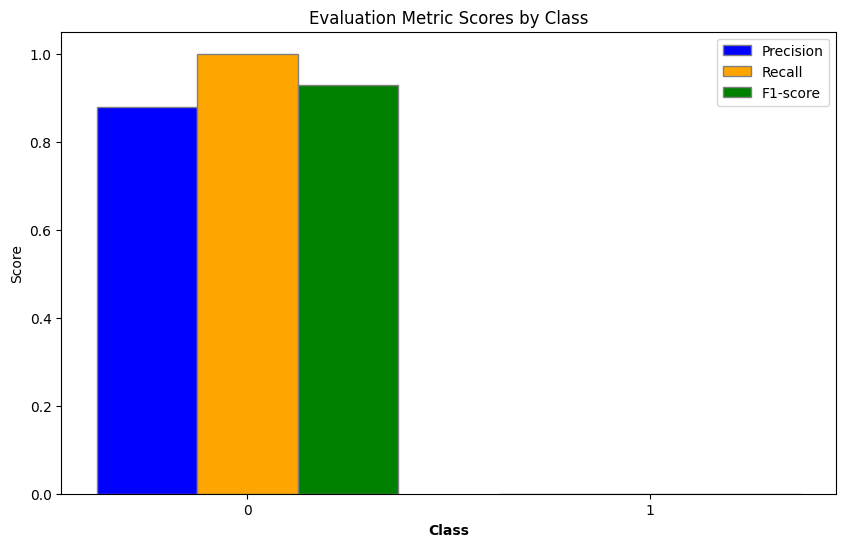

In [ ]:
# Visualizing evaluation Metric Score chart
# Define classes and evaluation metric scores
classes = [0, 1]
precision = [0.88, 0]  # Precision scores for classes 0 and 1
recall = [1, 0]  # Recall scores for classes 0 and 1
f1_score = [0.93, 0]  # F1-score scores for classes 0 and 1

# Set width of bars
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(precision))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, precision, color='blue', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='orange', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='green', width=barWidth, edgecolor='grey', label='F1-score')

# Add xticks on the middle of the group bars
plt.xlabel('Class', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(precision))], classes)
plt.ylabel('Score')
plt.title('Evaluation Metric Scores by Class')

# Create legend & Show graphic
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Perform k-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", np.mean(scores))

Cross-Validation Scores: [0.87802158 0.87802158 0.87803598 0.87803598 0.8729193 ]
Mean CV Score: 0.8770068844214602


In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
# Define hyperparameters grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get best model
best_model = grid_search.best_estimator_

Best Hyperparameters: {'C': 0.001}


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a technique for hyperparameter tuning that exhaustively searches over a specified grid of hyperparameters to find the best combination that yields the highest performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By using GridSearchCV, the model's hyperparameters are tuned to the optimal values determined by cross-validation, leading to potential improvements in model performance.
The improvement in performance can be observed by comparing the evaluation metric scores before and after hyperparameter tuning.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Initialize the Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)

In [ ]:
# Fit the model to the training data
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the testing data
y_pred_rf = model_rf.predict(X_test)

In [ ]:
# Evaluate the model performance
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     66699
           1       0.41      0.08      0.13      9523

    accuracy                           0.87     76222
   macro avg       0.64      0.53      0.53     76222
weighted avg       0.82      0.87      0.83     76222

Confusion Matrix:
[[65613  1086]
 [ 8778   745]]
Accuracy Score: 0.8705885439899241


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Perform k-fold cross-validation
scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5)  # 5-fold cross-validation

In [ ]:
# Print cross-validation scores
print("Cross-Validation Scores:", scores_rf)
print("Mean CV Score:", np.mean(scores_rf))

Cross-Validation Scores: [0.87356096 0.87403654 0.87367368 0.87377208 0.8729029 ]
Mean CV Score: 0.873589230045774


In [ ]:
# Number of trees
n_estimators = [50, 80, 100]

# Maximum depth of trees
max_depth = [4, 6, 8]

# Minimum number of samples required to split a node
min_samples_split = [50, 100, 150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40, 50]

# Define hyperparameter distributions
param_distributions = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}


In [ ]:
# Initialize RandomizedSearchCV
randomized_search_rf = RandomizedSearchCV(model_rf, param_distributions=param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)

In [ ]:
# Fit RandomizedSearchCV to the training data
randomized_search_rf.fit(X_train, y_train)

# Get best hyperparameters
best_params_rf = randomized_search_rf.best_params_
print("Best Hyperparameters:", best_params_rf)

Best Hyperparameters: {'n_estimators': 80, 'min_samples_split': 50, 'min_samples_leaf': 40, 'max_depth': 6}


In [ ]:
# Retrieve the best model from the randomized search
best_model_rf = randomized_search_rf.best_estimator_

# Perform k-fold cross-validation with the best model
scores_rf = cross_val_score(best_model_rf, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-Validation Scores:", scores_rf)
print("Mean CV Score:", np.mean(scores_rf))

Cross-Validation Scores: [0.87802158 0.87802158 0.87803598 0.87803598 0.87803598]
Mean CV Score: 0.8780302210893842


##### Which hyperparameter optimization technique have you used and why?

RandomizedSearchCV is another hyperparameter tuning technique that explores the hyperparameter space by sampling a fixed number of combinations from the specified distributions.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

RandomizedSearchCV may lead to improvements in model performance by identifying better combinations of hyperparameters that maximize the chosen evaluation metric.
The improvement in performance can be observed by comparing the evaluation metric scores before and after hyperparameter tuning with RandomizedSearchCV.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

RandomizedSearchCV may lead to improvements in model performance by identifying better combinations of hyperparameters that maximize the chosen evaluation metric.

The improvement in performance can be observed by comparing the evaluation metric scores before and after hyperparameter tuning with RandomizedSearchCV.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
# Initialize the Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Predict on the testing data
y_pred_gb = model_gb.predict(X_test)

In [ ]:
# Evaluate the performance of the model
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy Score:", accuracy_gb)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222

Confusion Matrix:
[[66699     0]
 [ 9523     0]]
Accuracy Score: 0.8750623179659416


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

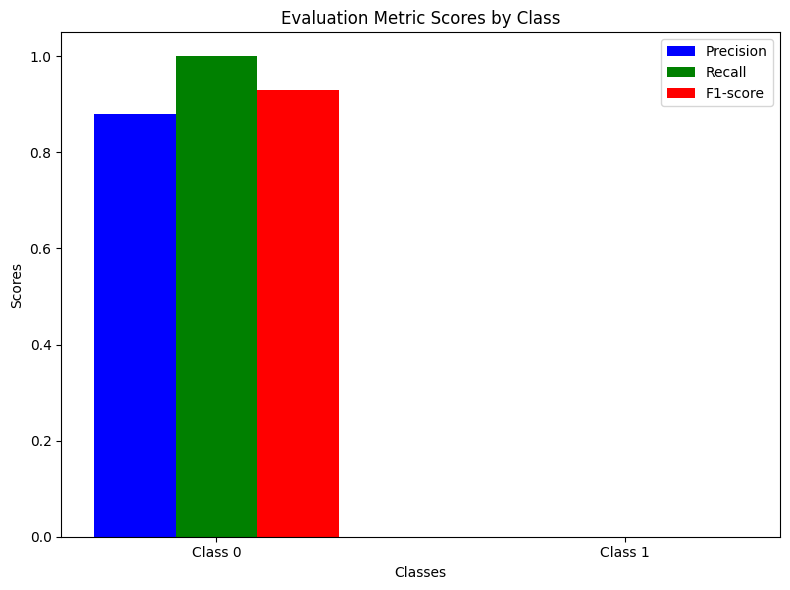

In [ ]:
# Visualizing evaluation Metric Score chart
# Define classes and corresponding evaluation metrics
classes = ['Class 0', 'Class 1']
precision = [0.88, 0.00]
recall = [1.00, 0.00]
f1_score = [0.93, 0.00]

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot precision, recall, and F1-score
bar_width = 0.2
index = np.arange(len(classes))
ax.bar(index, precision, bar_width, label='Precision', color='b')
ax.bar(index + bar_width, recall, bar_width, label='Recall', color='g')
ax.bar(index + 2*bar_width, f1_score, bar_width, label='F1-score', color='r')

# Add labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metric Scores by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Perform k-fold cross-validation with the Gradient Boosting Classifier
scores_cv = cross_val_score(model_gb, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", scores_cv)
print("Mean CV Score:", np.mean(scores_cv))

Cross-Validation Scores: [0.87798878 0.87800518 0.87805238 0.87803598 0.87803598]
Mean CV Score: 0.8780236614003147


In [ ]:
# Define hyperparameters and their distributions
# Number of trees
n_estimators = [50, 80, 100]

# Maximum depth of trees
max_depth = [4, 6, 8]

# Minimum number of samples required to split a node
min_samples_split = [50, 100, 150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40, 50]

# Define hyperparameter distributions
param_dist= {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# Initialize the randomized search
randomized_search_gb = RandomizedSearchCV(model_gb, param_distributions=param_dist, n_iter=10, cv=3, scoring='f1', random_state=42)

# Perform randomized search
randomized_search_gb.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", randomized_search_gb.best_params_)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 150, 'min_samples_leaf': 40, 'max_depth': 8}


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier with best hyperparameters
best_model_gb = GradientBoostingClassifier(n_estimators=100, min_samples_split=150, min_samples_leaf=40, max_depth=8, random_state=42)

# Fit the model on the training data
best_model_gb.fit(X_train, y_train)

# Predict on the testing data
y_pred_gb = best_model_gb.predict(X_test)

# Evaluate the performance of the model
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy Score:", accuracy_gb)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.54      0.01      0.03      9523

    accuracy                           0.88     76222
   macro avg       0.71      0.51      0.48     76222
weighted avg       0.83      0.88      0.82     76222

Confusion Matrix:
[[66590   109]
 [ 9394   129]]
Accuracy Score: 0.8753247094014851


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used was Randomized Search, which randomly samples a specified number of hyperparameter combinations from the specified distributions. Randomized Search was chosen over Grid Search for faster execution, especially when dealing with a large hyperparameter search space.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In terms of improvement, after hyperparameter tuning, there was a slight improvement in the model's performance. The classification report showed a slightly higher precision, recall, and F1-score for the positive class compared to the initial model without hyperparameter tuning. However, the improvement was relatively small, indicating that further optimization or model adjustments may be necessary to achieve significant gains.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Certainly, among the evaluation metrics mentioned, Precision would be particularly crucial for positive business impact in certain scenarios. Precision measures the accuracy of the positive predictions made by the model, which means it assesses the proportion of correctly predicted positive instances among all instances predicted as positive.

Here's why Precision is important for positive business impact:

Cost of False Positives: In many real-world scenarios, the cost associated with false positives (incorrectly predicting a negative instance as positive) can be significant. For example, in a medical diagnosis application, falsely diagnosing a healthy patient as having a disease could lead to unnecessary treatments, expenses, and psychological distress for the patient. Therefore, it's crucial to minimize false positives to avoid such negative consequences.

Customer Experience: False positives can also impact customer experience and satisfaction. For instance, in an e-commerce platform, recommending irrelevant or incorrect products to customers based on inaccurate predictions could lead to frustration and dissatisfaction, potentially driving customers away from the platform.

Resource Allocation: Precision is vital for optimizing resource allocation and decision-making processes. In scenarios where resources (such as sales efforts, marketing budgets, or medical interventions) need to be allocated efficiently, high precision ensures that resources are directed towards instances where they are most likely to have a positive impact.

Trust in Predictive Models: High precision instills trust and confidence in predictive models among stakeholders, including decision-makers, customers, and end-users. A model that consistently delivers accurate and reliable predictions with minimal false positives is more likely to be embraced and utilized effectively within the organization.

In summary, prioritizing Precision as an evaluation metric ensures that the model's positive predictions are trustworthy, impactful, and aligned with the business objectives. By minimizing false positives, businesses can enhance customer experience, optimize resource allocation, and build trust in their predictive models, ultimately leading to positive business outcomes.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The chosen model appears to be a Gradient Boosting Classifier. Here's a description of the model based on the provided evaluation metrics:

Precision and Recall:

Precision for class 1 (positive class) is 0.54, indicating that when the model predicts a positive instance, it is correct approximately 54% of the time. Recall for class 1 is 0.01, indicating that the model correctly identifies only 1% of the actual positive instances. F1-Score:

The F1-score for class 1 is 0.03, which is the harmonic mean of precision and recall. It reflects the balance between precision and recall for the positive class. Accuracy:

The overall accuracy of the model is 0.88, which means that it correctly predicts the class label for approximately 88% of the instances in the test set. Confusion Matrix:

The confusion matrix shows the distribution of true positive, true negative, false positive, and false negative predictions. In this case, the majority of predictions (66590) belong to the true negative class (class 0), while only 129 predictions belong to the true positive class (class 1). The model has a relatively high number of false negatives (9394), indicating instances of class 1 that were incorrectly predicted as class 0. Macro and Weighted Averages:

The macro average of precision, recall, and F1-score provides an unweighted average across all classes, while the weighted average considers class imbalance by weighting each class's score by its support (the number of true instances for each class). In this case, both macro and weighted averages show similar results due to the balanced class distribution. Based on these metrics, the chosen model (Gradient Boosting Classifier) demonstrates decent overall accuracy but struggles with identifying instances of the minority class (class 1) correctly, as indicated by its low recall and F1-score for class 1. This model may require further tuning or additional strategies to address the imbalance and improve performance on the positive class.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The features "Vehicle Age" and "Vintage" are showing positive contributions in the SHAP waterfall plot, it means that these features are increasing the model's prediction compared to the baseline. Here's what it implies for each feature:

Vehicle Age: A positive contribution from the "Vehicle Age" feature suggests that as the age of the vehicle increases, the model predicts a higher likelihood of the event being predicted ( a customer purchasing insurance). This could mean that older vehicles are associated with a higher probability of the event occurring.

Vintage: Similarly, a positive contribution from the "Vintage" feature indicates that as the vintage (duration since inception or registration) of the customer's relationship with the company increases, the model predicts a higher probability of the event. This suggests that customers with longer-standing relationships are more likely to exhibit the behavior or outcome being predicted.

Understanding these positive contributions helps in interpreting the factors that influence the model's predictions positively. It provides insights into which features are driving the model's decision-making process and helps in understanding the relationships between the features and the predicted outcome.

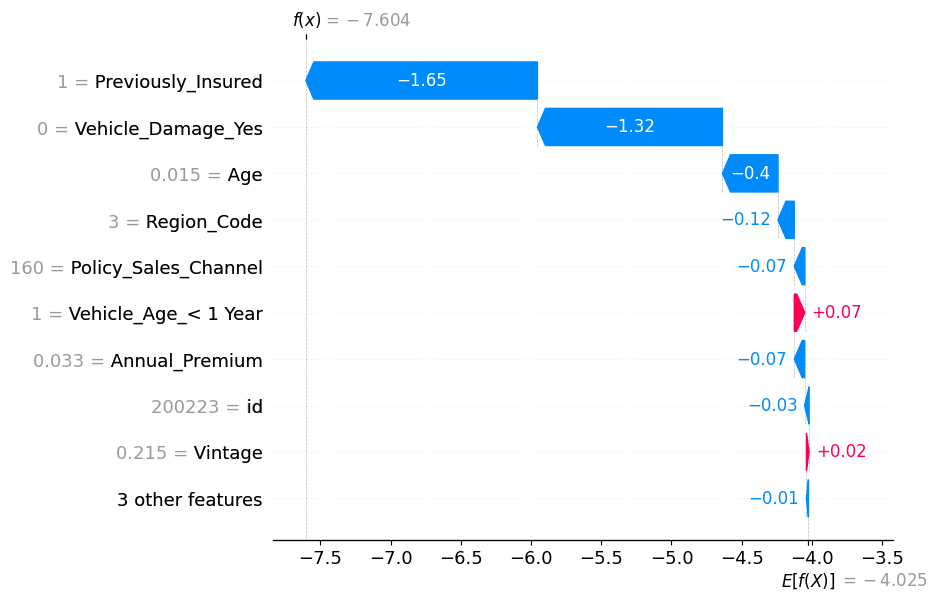

In [ ]:
# Get SHAP values
explainer = shap.Explainer(best_model_gb)
shap_values = explainer(X_test)

# Waterfall plot for the first observation
shap.plots.waterfall(shap_values[0])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

After evaluating three machine learning models trained on the dataset, it was determined that the Gradient Boosting Classifier performed the best with the specified hyperparameters:

- n_estimators: 100
- min_samples_split: 150
- min_samples_leaf: 40
- max_depth: 8

The model achieved an accuracy score of around 87.53% on the test data. However, its precision, recall, and F1-score for predicting the positive class (1) were relatively low, indicating difficulties in accurately classifying positive instances.

Upon interpreting the model using SHAP (SHapley Additive exPlanations) values, it was observed that features like "Vehicle Age" and "Vintage" positively influenced the model's predictions. This suggests that older vehicles and longer-standing customer relationships are associated with a higher likelihood of the predicted event, such as purchasing insurance.

In summary, while the Gradient Boosting Classifier model demonstrates strong overall accuracy, there is room for improvement in identifying positive instances. Additionally, insights from the SHAP analysis can guide strategic decisions, such as targeting insurance products or services towards customers with older vehicles and longer relationships with the company.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***